<a href="https://colab.research.google.com/github/khaled-kk/Clustering/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans

1000          height    weight  body mass  shoulders  lenght of arms
13384 -0.978935 -1.788507  -1.602963  -1.882231       -0.988242
90676 -1.115173  0.596256   1.273572   0.705782       -0.977648
80564  1.222713  0.252277  -0.305910   0.418763        1.240420
41930 -1.574727 -1.214810  -0.651364  -1.218916       -1.539856
93353  1.693045  1.084225   0.342862   1.057938        1.810270
2000          height    weight  body mass  shoulders  lenght of arms
79485  0.560642  0.221190  -0.020276   0.092820        0.381917
95588  1.236840  1.447169   0.940643   1.369935        1.308443
72064 -1.018689  0.378704   0.967909   0.384846       -0.933964
84132  0.326984  1.007713   0.978200   1.068614        0.433133
59395  1.465860  2.192167   1.612294   2.365178        1.553796
3000          height    weight  body mass  shoulders  lenght of arms
89705  1.333734 -0.304131  -0.919429  -0.237178        1.238938
95754  0.661777  0.865608   0.635606   0.785061        0.723594
87606  1.360833 -0.663507

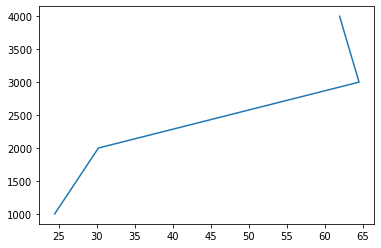

In [ ]:
# Step 1 read the data from CSV file
data= pd.read_csv(r"group3.csv", delimiter=',', header=None, skiprows=1, names=['height','weight','body mass','shoulders','lenght of arms'])

# Step 2 genrate the normalized data
data=(data-data.mean())/data.std()

# Step 3  define the data name and set the sample number
N = data[['height','weight','body mass','shoulders','lenght of arms']]
S=[1000,2000,3000,4000]
running_time = []
for sample in S:
  start_time=time.time()
  N = data.sample(sample)
  # Step 4  Choose the number of clusters (k)
  #K=3
  K=5

  # Step 5 select random centroid for each cluster
  Centroids = (N.sample(n=K))
  print(sample,Centroids)

  # Step 6 - Assign all the points to the closest cluster centroid
  # Step 7 - Recompute centroids of newly formed clusters
  # Step 8 - Repeat step 6 and 7
  diff = 1
  j=0

  while(diff!=0):
      XD=N
      i=1
      for index1,row_c in Centroids.iterrows():
          ED=[]
          for index2,row_d in XD.iterrows():
              d1=(row_c["height"]-row_d["height"])**2
              d2=(row_c["weight"]-row_d["weight"])**2
              d3=(row_c["body mass"]-row_d["body mass"])**2
              d4=(row_c["shoulders"]-row_d["shoulders"])**2
              d5=(row_c["lenght of arms"]-row_d["lenght of arms"])**2
              d=np.sqrt(d1+d2+d2+d3+d4+d5)
              ED.append(d)
          N[i]=ED
          i=i+1

      C=[]
      i=0
      for index,row in N.iterrows():
          min_dist=row[1]
          pos=1
          for i in range(K):
              if row[i+1] < min_dist:
                  min_dist = row[i+1]
                  pos=i+1
          C.append(pos)
      N["Cluster"]=C

      Centroids_new = N.groupby(["Cluster"]).mean()[["height","weight","body mass","shoulders","lenght of arms"]]
      if j == 0:
          diff=1
          j=j+1
      else:
          diff = (Centroids_new['height'] - Centroids['height']).sum()+(Centroids_new['weight'] - Centroids['weight']).sum()+(Centroids_new['body mass'] - Centroids['body mass']).sum()+(Centroids_new['shoulders'] - Centroids['shoulders']).sum()+(Centroids_new['lenght of arms'] - Centroids['lenght of arms']).sum()

      Centroids = N.groupby(["Cluster"]).mean()[["height","weight","body mass","shoulders","lenght of arms"]]

  end_time=time.time()
  running_time.append(end_time - start_time)

print("N=",S)
print("running time",running_time)
plt.plot(running_time,S)
plt.show()

In [ ]:
def PCA(X , num_components):

    #Step-1
    X_meaned = X - np.mean(X , axis = 0)

    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)

    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)


    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

    return X_reduced

              X         Y
22357 -2.630608  0.195736
60913 -1.916973 -1.487223
95142 -1.339370  0.333462
44489  0.515958  0.136833
76991 -0.124164  0.951358
Size of Cluster 0 = 15.299999999999999 %
Size of Cluster 1 = 25.0 %
Size of Cluster 2 = 15.0 %
Size of Cluster 3 = 23.200000000000003 %
Size of Cluster 4 = 21.5 %


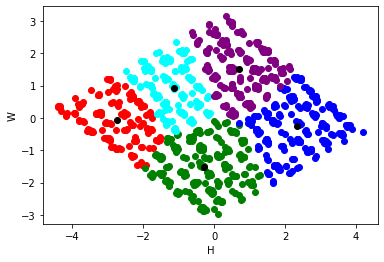

In [ ]:
# Step 1 read the data from CSV file
data= pd.read_csv(r"group3.csv", delimiter=',', header=None, skiprows=1, names=['height','weight','body mass','shoulders','lenght of arms'])

# Step 2 genrate the normalized data
data=(data-data.mean())/data.std()

# Step 3  define the data name and set the sample number
N = data[['height','weight','body mass','shoulders','lenght of arms']]

# Step 4  Choose the number of clusters (k)
#K=3
K=5

mat_reduced = PCA(N, 2)

mat_reduced2 = pd.DataFrame(mat_reduced, columns=["X", "Y"])

# Step 5 select random centroid for each cluster
Centroids = (mat_reduced2.sample(n=K))
print(Centroids)

mat_reduced3=mat_reduced2.sample(1000)


diff = 1
j=0

while(diff!=0):
    XD=mat_reduced3
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["X"]-row_d["X"])**2
            d2=(row_c["Y"]-row_d["Y"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        mat_reduced3[i]=ED
        i=i+1

    C=[]
    for index,row in mat_reduced3.iterrows():
        min_dist=row[1]
        pos=1

        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    mat_reduced3["Cluster"]=C

    Centroids_new = mat_reduced3.groupby(["Cluster"]).mean()[["X","Y"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['X'] - Centroids['X']).sum() + (Centroids_new['Y'] - Centroids['Y']).sum()
    Centroids = mat_reduced3.groupby(["Cluster"]).mean()[["X","Y"]]


color=['red','green','cyan','blue','purple']
for k in range(K):
    data=mat_reduced3[mat_reduced3["Cluster"]==k+1]
    plt.scatter(data["X"],data["Y"],c=color[k])
    print("Size of Cluster",k, "=",  (data.size/mat_reduced3.size)*100, "%")

color2=["black"]
plt.scatter(Centroids["X"],Centroids["Y"],c=color2[0])
plt.xlabel('H')
plt.ylabel('W')
plt.show()